# 📘 The Gamma Distribution — An Intuitive Overview

The **gamma distribution** is a **two‑parameter family of continuous probability distributions** defined on non‑negative real numbers. It’s one of the most important distributions in probability and statistics because it naturally models **waiting times** and appears in **Poisson processes**, **Bayesian statistics**, **variance estimation**, and **queuing theory**.

---

## 🎯 What It Models (Intuition First)

A gamma distribution describes the **waiting time until the $\alpha$‑th event** in a Poisson process.  

- If events happen randomly at a constant average rate (like radioactive decay, phone calls to a call center, or accidents on a highway),  
- then the time until the **first** event is **exponential**,  
- and the time until the **$\alpha$‑th** event is **gamma**.

So the gamma distribution generalizes the exponential distribution.

---

## 🔧 Parameters

There are two common parameterizations:

| Parameterization | Parameters | Interpretation |
|------------------|------------|----------------|
| **Shape–Scale** | shape $ \alpha > 0 $, scale $ \theta > 0 $ | Mean $ = \alpha \theta $, variance $ = \alpha \theta^2 $ |
| **Shape–Rate** | shape $ \alpha > 0 $, rate $ \lambda = 1/\theta > 0 $ | Mean $ = \alpha / \lambda $, variance $ = \alpha / \lambda^2 $ |

The **shape parameter** controls how “peaked” or “spread out” the distribution is.  
The **scale (or rate)** stretches or compresses the distribution horizontally.

---

## 📈 Probability Density Function (PDF)

Using the shape–scale form:

$$
f(x; \alpha, \theta) = 
\frac{x^{\alpha - 1} e^{-x/\theta}}{\Gamma(\alpha)\,\theta^\alpha},
\quad x > 0
$$

Here $ \Gamma(\alpha) $ is the **gamma function**, which generalizes factorials to real numbers.

---

## ⭐ Special Cases

The gamma distribution includes several well‑known distributions as special cases:

- **Exponential distribution**: when $ \alpha = 1 $
- **Erlang distribution**: when $ \alpha $ is a positive integer
- **Chi‑square distribution**: when $ \alpha = r/2 $ and $ \theta = 2 $ where $r$ are the degrees of freedom

This makes the gamma distribution a kind of “parent” distribution for many others.

---

## 📊 Key Properties

- **Support:** $ x \ge 0 $  
- **Mean:** $ \alpha \theta $  
- **Variance:** $ \alpha \theta^2 $  
- **Mode:** $ (\alpha - 1)\theta $ for $ \alpha > 1 $  
- **Skewness:** $ 2 / \sqrt{\alpha} $  
- **Kurtosis (excess):** $ 6 / \alpha $  
  (All from standard formulas summarized in.)

As $ \alpha $ increases, the distribution becomes more symmetric and approaches a normal distribution (via the central limit theorem).

---

## 🧠 Why It Matters

The gamma distribution shows up everywhere:

- **Waiting times** in Poisson processes
- **Bayesian priors** for rates (conjugate prior for Poisson and exponential)
- **Modeling rainfall**, insurance claims, and failure times
- **Sum of squared normal variables** → chi‑square → gamma

Its flexibility makes it a workhorse in applied probability.

---

## 📈 Plot

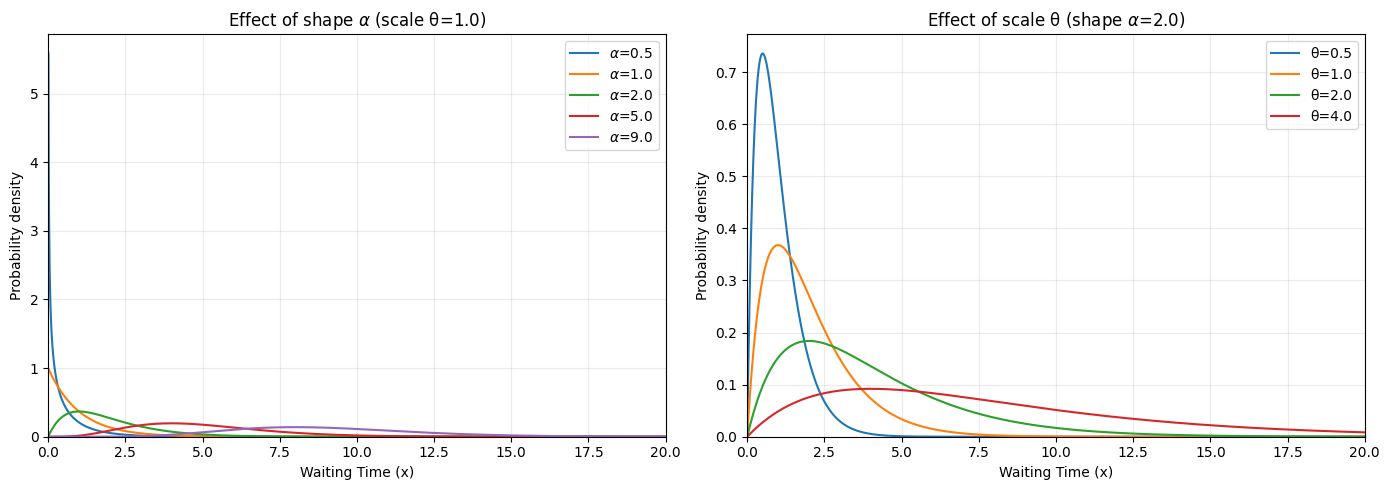

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

x = np.linspace(0, 20, 2000)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left: vary shape alpha, fixed scale theta
fixed_theta = 1.0
alphas = [0.5, 1.0, 2.0, 5.0, 9.0]
for a in alphas:
    axes[0].plot(x, gamma.pdf(x, a=a, scale=fixed_theta), label=f"$\\alpha$={a}")
axes[0].set_title(f"Effect of shape $\\alpha$ (scale θ={fixed_theta})")
axes[0].set_xlim(0, 20)
axes[0].set_ylim(0, None)
axes[0].legend()
axes[0].grid(alpha=0.25)
axes[0].set_xlabel("Waiting Time (x)")
axes[0].set_ylabel("Probability density")

# Right: vary scale theta, fixed shape alpha
fixed_alpha = 2.0
thetas = [0.5, 1.0, 2.0, 4.0]
for th in thetas:
    axes[1].plot(x, gamma.pdf(x, a=fixed_alpha, scale=th), label=f"θ={th}")
axes[1].set_title(f"Effect of scale θ (shape $\\alpha$={fixed_alpha})")
axes[1].set_xlim(0, 20)
axes[1].set_ylim(0, None)
axes[1].legend()
axes[1].grid(alpha=0.25)
axes[1].set_xlabel("Waiting Time (x)")
axes[1].set_ylabel("Probability density")

plt.tight_layout()
plt.show()

# 🎯 CDF

The **cumulative distribution function (CDF)** of a $\text{Gamma}(\alpha, \theta)$ random variable $X$ gives the probability that the waiting time until $\alpha$ events occur is **less than or equal to** some value $x$.
- The probability of **having at least $\alpha$ occurrences by time $x$**.

---

### 📌 It’s how you compute probabilities in real problems  
In the bakery example, the question is:

**“What’s the probability the first 3 customers arrive within 10 minutes?”**

That is *exactly* a CDF evaluation:

$$
P(X \le 10)
$$

---

### ☯️ The Gamma distribution's connection to the Poisson process  
- The **Poisson distribution** asks:  
  “How many events have happened by time $x$?”

- The **Gamma distribution** asks:  
  “How long until the $\alpha$-th event occurs?”

These are inverse questions.

If the $\alpha$-th event occurs before time $x$, then by time $x$ you must have at least $\alpha$ events.

If the $\alpha$-th event occurs after time $x$, then by time $x$ you have fewer than $\alpha$ events.

The CDF is derived by asking:

**“What is the probability that fewer than α events have occurred by time x?”**

That’s a Poisson probability.  So the Gamma CDF is the *complement* of a Poisson tail probability:

$$
F(x) = 1 - P(\text{fewer than }\alpha\text{ occurrences before time }x)  
$$

$$
F(X) = 1 - P(\text{Poisson}(\lambda x) < \alpha)
$$

The Gamma CDF is the probability that the α‑th event has happened by time $x$ — which is the same as the probability that the Poisson count by time $x$ is at least α.

And “at least α” is the complement of “fewer than α.”

### Example

A call center receives calls according to a Poisson process with rate $\lambda = 12$ per hour.  
Let $T_4$ be the waiting time until the 4th call.

Since $T_4 \sim \text{Gamma}(k=4, \theta = 1/12)$, compute:

1. $P(T_4 \le 10 \text{ minutes})$  
2. $P(T_4 > 20 \text{ minutes})$

In [16]:
import scipy.stats as stats
alpha = 4
theta = 5

ans1 = stats.gamma.cdf(10, a=alpha, scale=theta)
print(f"1) {ans1}")

ans2 = stats.gamma.sf(20, a=alpha, scale=theta)
print(f"2) {ans2}")

1) 0.14287653950145296
2) 0.43347012036670896


1) There's about a 14.3% chance that 4 calls will arrive within the first 10 minutes.

2) There’s about a 43.3% chance that it takes more than 20 minutes for four calls to arrive.